In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy,scipy,matplotlib

Sebastian Raschka 

CPython 3.6.1
IPython 6.0.0

numpy 1.13.0
scipy 0.19.0
matplotlib 2.0.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Probability Density Functions (PDFs)

- for working with continuous variables (vs. probability mass functions for discrete variables)
- here, the area under the curve give the probability (in contrast to probability mass functions where we have probabilities for every single value)
- the area under the whole curve is 1

## Normal Distribution (Gaussian Distribution)

- unimodal and symmetric
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)
- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$


- standard normal distribution with zero mean and unit variance, $N(0, 1)$:

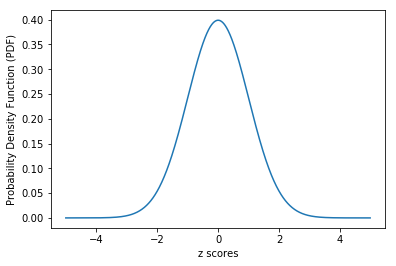

In [3]:
def univariate_gaussian(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

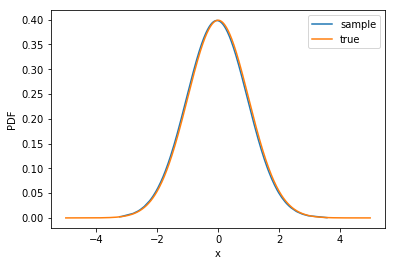

In [4]:
sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

sample_mean = np.mean(sample)
sample_variance = np.var(sample, ddof=1)
sample_sorted = np.sort(sample)
sample_pdf = univariate_gaussian(sample_sorted, sample_mean, sample_variance)

plt.plot(sample_sorted, sample_pdf, label='sample')
plt.plot(x, y, label='true')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend()
plt.show()

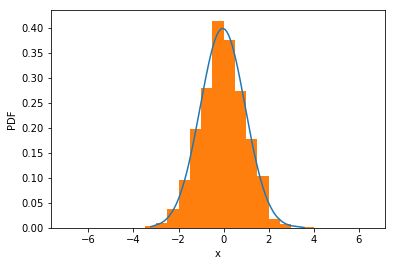

In [5]:
plt.plot(sample_sorted, sample_pdf)
plt.hist(sample_sorted, normed=True, bins=np.arange(-7, 7, 0.5))
plt.ylabel('PDF')
plt.xlabel('x')
plt.show()

### Cumulative Distribution Function (CDF)

- CDF of the normal distribution:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$


In [6]:
from scipy.integrate import quad


def cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))


def cdf(x, mean, variance):

    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(cdf_helper, -np.inf, val, args=(mean, variance))[0])
        out.append(integ)
    return out

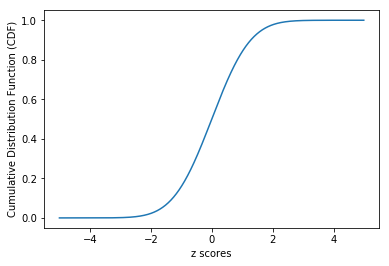

In [7]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

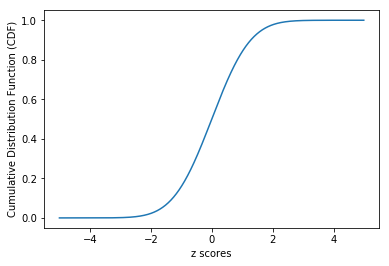

In [8]:
from scipy.stats import norm

y = norm.cdf(x)

plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

### to be continued ...